### Imporitng Libraries

In [1]:
import pandas as pd
import numpy as np
from charset_normalizer import from_path
import glob
import matplotlib.pyplot as plt
import torch
import random

In [2]:
csv_path = glob.glob("data/*.csv")
print("CSV file path:", csv_path)

best_enc = from_path(csv_path[0]).best().encoding
print("Suggested encoding:", best_enc)

CSV file path: ['data\\Houses.csv']
Suggested encoding: cp1250


In [3]:
house_data = pd.read_csv(csv_path[0], encoding=best_enc)

print("Shape:", house_data.shape, '\n')
house_data.head(3)

Shape: (23764, 11) 



,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0


In [128]:
wwa_data = house_data[house_data.city == 'Warszawa'].copy()

print("Shape:", wwa_data.shape, '\n')
wwa_data.head(3)

Shape: (9851, 11) 



,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.0,6.0,280.00,2003.0


In [129]:
wwa_data = wwa_data.drop(columns=['Unnamed: 0', 'address', 'city', 'id', 'latitude', 'longitude', 'floor'], errors='ignore')
wwa_data.head(3)

,price,rooms,sq,year
1,240548.0,1.0,24.38,2021.0
4,996000.0,5.0,105.00,2020.0
7,2890000.0,6.0,280.00,2003.0


In [130]:
wwa_data['year'] = 2026.0 - wwa_data['year']
wwa_data.rename(columns={'year': 'age'}, inplace=True)
wwa_data.head()

,price,rooms,sq,age
1,240548.0,1.0,24.38,5.0
4,996000.0,5.0,105.00,6.0
7,2890000.0,6.0,280.00,23.0
8,615000.0,4.0,63.40,44.0
9,429000.0,1.0,40.00,27.0


In [131]:
wwa_data['price_per_m2'] = wwa_data['price'] / wwa_data['sq']
wwa_data['price_per_room'] = wwa_data['price'] / wwa_data['rooms']
wwa_data.head()

,price,rooms,sq,age,price_per_m2,price_per_room
1,240548.0,1.0,24.38,5.0,9866.611977,240548.000000
4,996000.0,5.0,105.00,6.0,9485.714286,199200.000000
7,2890000.0,6.0,280.00,23.0,10321.428571,481666.666667
8,615000.0,4.0,63.40,44.0,9700.315457,153750.000000
9,429000.0,1.0,40.00,27.0,10725.000000,429000.000000


In [132]:
wwa_data.describe()

,price,rooms,sq,age,price_per_m2,price_per_room
count,9.851000e+03,9851.000000,9851.000000,9851.000000,9851.000000,9.851000e+03
mean,7.806199e+05,2.627347,62.704040,29.928738,12244.036499,2.993423e+05
std,7.063321e+05,1.012861,95.529845,49.625532,4529.248465,1.823438e+05
min,5.000000e+03,1.000000,8.800000,-954.000000,43.320000,2.500000e+03
25%,4.650000e+05,2.000000,43.000000,6.000000,9736.009300,2.000000e+05
50%,5.950000e+05,3.000000,54.300000,18.000000,11520.737327,2.575000e+05
75%,8.250000e+05,3.000000,70.500000,51.000000,13604.651163,3.400000e+05
max,1.500000e+07,10.000000,9000.000000,1951.000000,138636.363636,3.375000e+06


In [133]:
# for col in wwa_data.columns:
#     print(f"Sorted by: |{col}|")
#     print(wwa_data.sort_values(by=col).head(), '\n')

In [134]:
def plot_hist(data, col, index):
    plt.subplot(2, 3, index)
    plt.hist(data, bins=100)
    perc_95 = np.percentile(data, 95)
    plt.axvline(perc_95, ls='--', color='red', label=f"Percen. (95): {perc_95:.2f}")
    plt.title(f"Column: {col}")
    plt.legend()

In [135]:
def plot_scatter(df, col_x, index):
    plt.subplot(2, 3, index)
    plt.scatter(x = df[col_x], y = df['price'])
    plt.xlabel(f"{col_x}")

In [136]:
def plot_data(df, plot_type = 'hist'):
    plt.figure(figsize=(12, 6))
    cols = df.columns
    
    for i in range(len(columns)):
        if plot_type == 'hist':
            plot_hist(df[columns[i]], columns[i], i+1)
        else:
            plot_scatter(df, columns[i], i+1)

    plt.tight_layout()
    plt.show()
    plt.close()

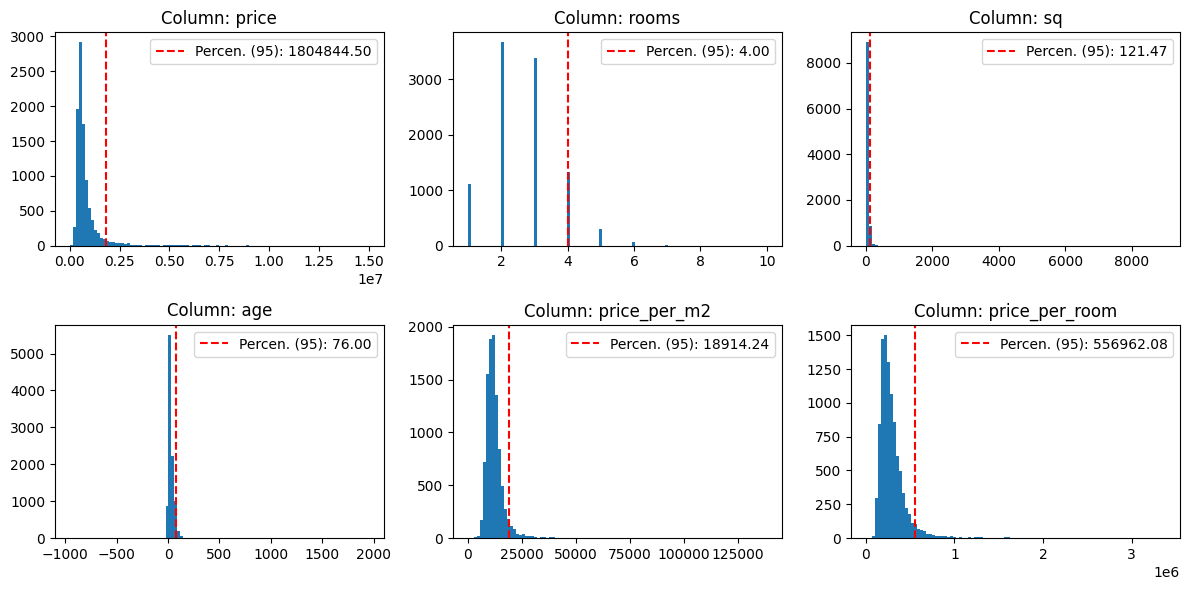

In [137]:
plot_data(wwa_data)

In [138]:
def trim_data(df, col, min_val, max_val):
    return df[(df[col] >= min_val) & (df[col] <= max_val)]

In [139]:
wwa_data = trim_data(wwa_data, 'price', 150000.0, 3500000.0)
wwa_data = trim_data(wwa_data, 'rooms', 1.0, 7.0)
wwa_data = trim_data(wwa_data, 'sq', 20.0, 200.0)
wwa_data = trim_data(wwa_data, 'age', 0.0, 150.0)
wwa_data = trim_data(wwa_data, 'price_per_m2', 6000.0, 35000.0)
wwa_data = trim_data(wwa_data, 'price_per_room', 0.0, 1000000.0)

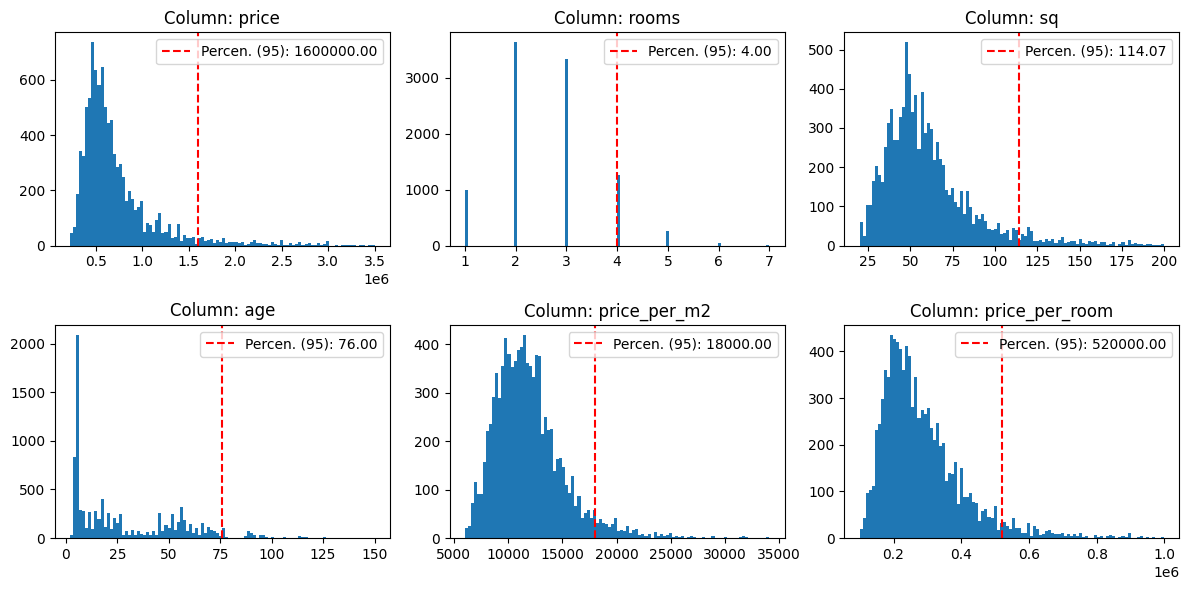

In [140]:
plot_data(wwa_data, 'hist')

In [141]:
print(len(wwa_data))

9546


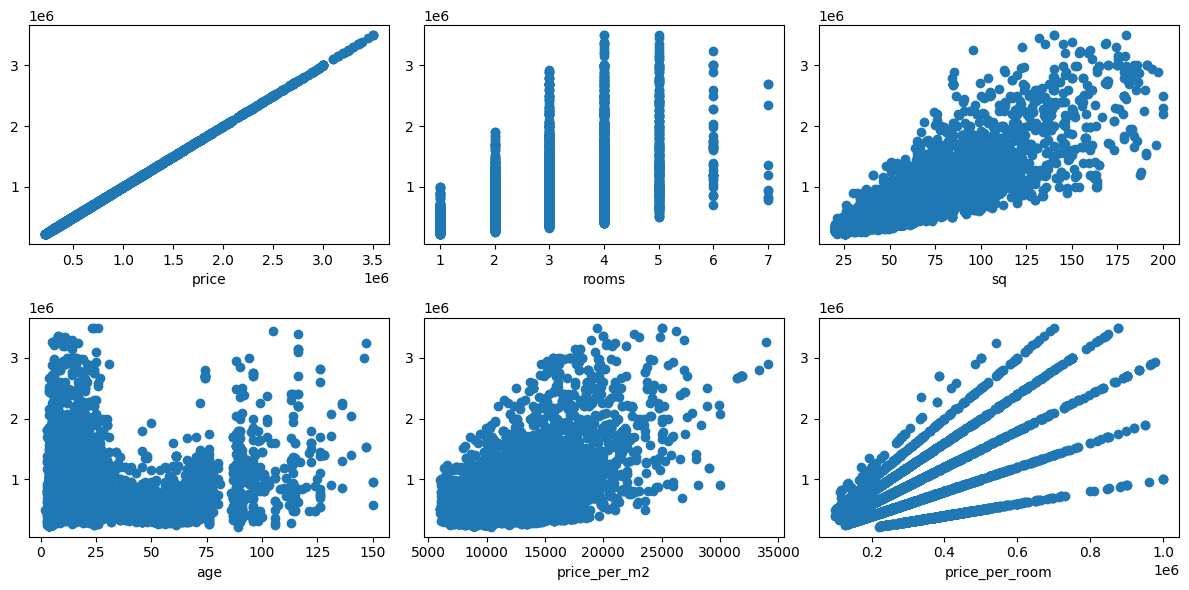

In [142]:
plot_data(wwa_data, 'scatter')

In [150]:
wwa_data = wwa_data.drop(columns=['price_per_m2', 'price_per_room'], errors = 'ignore')
print("\nShape:", wwa_data.shape)
wwa_data.describe()


Shape: (9546, 4)


,price,rooms,sq,age
count,9.546000e+03,9546.000000,9546.000000,9546.000000
mean,7.249740e+05,2.612403,60.171841,29.016132
std,4.394793e+05,0.971673,26.781564,26.797468
min,2.200000e+05,1.000000,20.000000,2.000000
25%,4.680520e+05,2.000000,43.000000,6.000000
50%,5.910000e+05,3.000000,54.000000,18.000000
75%,8.100000e+05,3.000000,70.000000,51.000000
max,3.500000e+06,7.000000,200.000000,150.000000


In [154]:
wwa_data = wwa_data.sample(frac=1).reset_index(drop=True)
wwa_data.head()

,price,rooms,sq,age
0,570000.0,1.0,38.6,91.0
1,860000.0,3.0,72.0,29.0
2,549999.0,2.0,38.5,73.0
3,429000.0,2.0,49.0,37.0
4,499000.0,3.0,58.0,24.0


In [157]:
wwa_data[:7800].describe()

,price,rooms,sq,age
count,7.800000e+03,7800.000000,7800.000000,7800.000000
mean,7.284629e+05,2.608077,60.175747,29.089744
std,4.462942e+05,0.968201,26.991152,27.000062
min,2.200000e+05,1.000000,20.000000,2.000000
25%,4.689998e+05,2.000000,43.000000,6.000000
50%,5.931920e+05,3.000000,54.000000,18.000000
75%,8.115391e+05,3.000000,69.890000,51.000000
max,3.500000e+06,7.000000,200.000000,150.000000


In [156]:
wwa_data[7800:].describe()

,price,rooms,sq,age
count,1.746000e+03,1746.00000,1746.000000,1746.000000
mean,7.093876e+05,2.63173,60.154387,28.687285
std,4.074016e+05,0.98708,25.832011,25.878017
min,2.246000e+05,1.00000,20.000000,3.000000
25%,4.656800e+05,2.00000,43.425000,6.000000
50%,5.900000e+05,3.00000,54.460000,19.000000
75%,7.990000e+05,3.00000,70.000000,50.000000
max,3.360000e+06,7.00000,197.350000,136.000000


In [158]:
sigma_y = wwa_data[['price']].copy()
sigma_X = wwa_data[['sq', 'rooms', 'age']].copy()
print("y:", sigma_y.head(), '\n')
print("X:", sigma_X.head(), '\n')

y:       price
0  570000.0
1  860000.0
2  549999.0
3  429000.0
4  499000.0 

X:      sq  rooms   age
0  38.6    1.0  91.0
1  72.0    3.0  29.0
2  38.5    2.0  73.0
3  49.0    2.0  37.0
4  58.0    3.0  24.0 



In [17]:
sigten_y = torch.tensor(sigma_y.values, dtype=torch.float32)
sigten_X = torch.tensor(sigma_X.values, dtype=torch.float32)
print(len(sigten_X))
print("y:", sigten_y, '\n')
print("X:", sigten_X, '\n')

9791
y: tensor([[2811950.],
        [ 245000.],
        [1384029.],
        ...,
        [1284000.],
        [ 470000.],
        [ 550000.]]) 

X: tensor([[139.6200,   4.0000, 126.0000],
        [ 17.5000,   1.0000,  58.0000],
        [121.4700,   3.0000,  14.0000],
        ...,
        [ 68.5700,   3.0000,   6.0000],
        [ 49.0000,   2.0000,  31.0000],
        [ 49.5000,   2.0000,  58.0000]]) 



In [18]:
standar_trainX = sigten_X[:7800]
sigten_mean = torch.mean(standar_trainX, dim=0)
sigten_std = torch.std(standar_trainX, dim=0)
print("Mean:", sigten_mean)
print("Std:", sigten_std)

Mean: tensor([61.1422,  2.6168, 29.1246])
Std: tensor([30.1950,  1.0032, 27.2038])


In [19]:
(sigten_X[0][1] - sigten_mean[1]) / sigten_std[1]

tensor(1.3787)

In [20]:
ready_X = (sigten_X - sigten_mean) / sigten_std
ready_X

tensor([[ 2.5990,  1.3787,  3.5611],
        [-1.4453, -1.6116,  1.0614],
        [ 1.9979,  0.3820, -0.5560],
        ...,
        [ 0.2460,  0.3820, -0.8500],
        [-0.4021, -0.6148,  0.0689],
        [-0.3856, -0.6148,  1.0614]])

In [160]:
data = WwaHousingData(wwa_data)
data.X, data.y

(tensor([[-0.7994, -1.6609,  2.2930],
         [ 0.4381,  0.4048, -0.0033],
         [-0.8031, -0.6280,  1.6263],
         ...,
         [-0.3770, -0.6280, -0.8552],
         [-0.6530, -0.6280, -0.8552],
         [ 2.2164,  0.4048,  3.2189]]),
 tensor([[ 57.0000],
         [ 86.0000],
         [ 54.9999],
         ...,
         [ 54.9000],
         [ 58.4000],
         [220.0000]]))

In [161]:
class WwaHousingData():
    def __init__(self, df, num_train=7800, batch_size=32):
        self.num_train = num_train
        self.num_val = len(df) - num_train
        self.batch_size = batch_size
        
        df_y = df[['price']].copy()
        df_X = df[['sq', 'rooms', 'age']].copy()
        
        self.y = torch.tensor(df_y.values, dtype=torch.float32) / 10000.0
        tensor_X = torch.tensor(df_X.values, dtype=torch.float32)
        
        self.stand_mean = torch.mean(tensor_X[:num_train], dim=0)
        self.stand_std = torch.std(tensor_X[:num_train], dim=0)
        self.X = (tensor_X - self.stand_mean) / self.stand_std

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X, self.y), train, i)

    def get_tensorloader(self, tensors, train, indices=slice(0, None)):
        tensors = tuple(a[indices] for a in tensors)
        dataset = torch.utils.data.TensorDataset(*tensors)
        return torch.utils.data.DataLoader(dataset, self.batch_size, shuffle=train)

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [32]:
class LinearRegressionModel():
    def __init__(self, num_params, l_rate, sigma=0.01):
        self.w = torch.normal(mean=0, std=sigma, size=(num_params, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.l_rate = l_rate
        self.val_tab = []
        self.train_tab = []
        
    def forward(self, X):
        return torch.matmul(X, self.w) + self.b

    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return l.mean()

    def configure_optimizers(self):
        return SGD([self.w, self.b], self.l_rate)

    def training_step(self, batch):
        l = self.loss(self.forward(batch[0]), batch[-1])
        return l

    def validation_step(self, batch):
        l = self.loss(self.forward(batch[0]), batch[-1])
        print(l)
        self.val_tab.append(l.detach().item())

In [33]:
class SGD():
    def __init__(self, params, l_rate):
        self.params = params
        self.l_rate = l_rate

    def step(self):
        with torch.no_grad():
            for param in self.params:
                param -= self.l_rate * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [34]:
class Trainer():
    def __init__(self, num_epochs):
        self.num_epochs = num_epochs

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        #self.num_train_batches = len(self.train_dataloader)
        #self.num_val_batches = len(self.val_dataloader)

    def fit(self, model, data):
        self.prepare_data(data)
        self.model = model
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.data = data
        #self.train_batch_idx = 0
        #self.val_batch_idx = 0
        for self.epoch in range(self.num_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        #self.model.train()
        for batch in self.data.train_dataloader():
            loss = self.model.training_step(batch)
            self.optim.zero_grad()
            #with torch.no_grad():
            loss.backward()
                # if self.gradient_clip_val > 0:  # To be discussed later
                #     self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
            #self.train_batch_idx += 1
        if self.val_dataloader is None:
            return
        #self.model.eval()
        for batch in self.data.val_dataloader():
            with torch.no_grad():
                self.model.validation_step(batch)
            #self.val_batch_idx += 1

In [48]:
data = WwaHousingData(wwa_data)
model = LinearRegressionModel(4, 0.001)
trainer = Trainer(100)
trainer.fit(model, data)

tensor(9014.0830)
tensor(2240.5854)
tensor(7000.7969)
tensor(3033.6743)
tensor(2947.2373)
tensor(4232.1943)
tensor(4349.5234)
tensor(2125.8132)
tensor(1313.6012)
tensor(1665.7557)
tensor(2263.1184)
tensor(2884.5884)
tensor(2060.3870)
tensor(1894.6549)
tensor(3071.4475)
tensor(3842.0603)
tensor(2542.6665)
tensor(2482.6372)
tensor(1856.1334)
tensor(2570.1221)
tensor(3896.1055)
tensor(2625.4790)
tensor(3490.2717)
tensor(1522.8895)
tensor(1424.3921)
tensor(4397.3960)
tensor(6213.3525)
tensor(3826.8376)
tensor(1733.1661)
tensor(10423.1895)
tensor(3202.9199)
tensor(1713.4197)
tensor(2224.8105)
tensor(1497.4316)
tensor(3097.5120)
tensor(4305.0020)
tensor(1422.0256)
tensor(1850.2743)
tensor(1582.9277)
tensor(1678.2296)
tensor(2730.8787)
tensor(1745.8940)
tensor(2359.1606)
tensor(2595.7134)
tensor(6669.1143)
tensor(3073.5911)
tensor(3798.2202)
tensor(1522.1459)
tensor(4655.1006)
tensor(2802.4895)
tensor(1446.2299)
tensor(2609.4026)
tensor(1390.5751)
tensor(5469.9209)
tensor(3854.2046)
tensor(12

In [42]:
with torch.no_grad():
    print(model.w, model.b)

tensor([[42.8504],
        [-1.0129],
        [-0.1783],
        [30.9124]], requires_grad=True) tensor([75.7978], requires_grad=True)


In [28]:
with torch.no_grad():
    print(model.train_tab)

[]


In [29]:
print(data.num_val)

1991


In [30]:
print(data.y)

print(data.X)

print(data.stand_mean)

print(data.stand_std)

tensor([[281.1950],
        [ 24.5000],
        [138.4029],
        ...,
        [128.4000],
        [ 47.0000],
        [ 55.0000]])
tensor([[ 2.5990,  1.3787,  3.5611,  2.1086],
        [-1.4453, -1.6116,  1.0614,  0.4907],
        [ 1.9979,  0.3820, -0.5560, -0.1960],
        ...,
        [ 0.2460,  0.3820, -0.8500,  1.7359],
        [-0.4021, -0.6148,  0.0689, -0.6709],
        [-0.3856, -0.6148,  1.0614, -0.2706]])
tensor([6.1142e+01, 2.6168e+00, 2.9125e+01, 1.2138e+04])
tensor([3.0195e+01, 1.0032e+00, 2.7204e+01, 3.7949e+03])
